In [86]:
# check the power spectra output sims

In [1]:
import os, sys                                                                                                                                                                                
from pixell import enmap, utils, lensing, aberration                                                                                                                                          
from pixell import powspec, curvedsky                                                                                                                                                         
import numpy as np, healpy as hp, logging, os, os.path as op                                                                                                                                  
import argparse
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
# add the parent dir in the python path                                                                                                                                                       
sys.path.append(os.path.dirname(os.getcwd()))                                                                                                                                                 
import param
#import plotlib as pl

In [2]:
from classy import Class

In [3]:
ls = np.arange(0, 6001, 1)
factor = ls*(ls+1)/(2*pi)

In [4]:
# check anisotropic rotation power spectrum from sim
if 0:
    alpha_alm = hp.read_alm(f"../simMaps/alpha_fullsky_alm_001.fits")
    alpha_cl = hp.alm2cl(np.complex128(alpha_alm))
    plt.plot(factor*alpha_cl)
    plt.yscale('log')
    plt.legend()

In [5]:
# check kappa power spectrum from sim
if 0:
    phi_alm = hp.read_alm('../simMaps/kappa_fullsky_alm_001.fits')
    phi_cl = hp.alm2cl(np.complex128(phi_alm))
    plt.plot(factor*phi_cl)
    plt.yscale('log')
    plt.legend()

In [6]:
oshape, owcs = enmap.fullsky_geometry(1*utils.arcmin)  
ellmax = 3000
ells = np.arange(0, ellmax+1)

In [7]:
theory_cl = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lensedCls.dat')

In [8]:
if 0:
    sim_num = 100
    teb_cls = []
    rot_teb_cls = []
    for isim in range(sim_num):
        print(f"{isim:03d}")
        teb_alm = hp.read_alm(f'../Maps/CMBLensed_fullsky_alm_{isim:03d}.fits',hdu=(1,2,3))
        rot_teb_alm = hp.read_alm(f'../Maps/CMBLensedRot_fullsky_alm_{isim:03d}.fits',hdu=(1,2,3))

        teb_cl = hp.alm2cl(np.complex128(teb_alm))
        rot_teb_cl = hp.alm2cl(np.complex128(rot_teb_alm))

        teb_cls.append(teb_cl)
        rot_teb_cls.append(rot_teb_cl)
    teb_cls = np.array(teb_cls)
    rot_teb_cls = np.array(rot_teb_cls)

In [9]:
# TT, EE, BB, TE, EB, TB
if 0:
    teb_cls_mean = np.mean(teb_cls, axis=0)
    rot_teb_cls_mean = np.mean(rot_teb_cls, axis=0)

    teb_cls_df = pd.DataFrame({'ls':ls, 'TT':teb_cls_mean[0],'EE':teb_cls_mean[1],'BB':teb_cls_mean[2],'TE':teb_cls_mean[3],'EB':teb_cls_mean[4],'TB':teb_cls_mean[5]})
    rot_teb_cls_df = pd.DataFrame({'ls':ls, 'TT':rot_teb_cls_mean[0],'EE':rot_teb_cls_mean[1],'BB':rot_teb_cls_mean[2],'TE':rot_teb_cls_mean[3],\
                                   'EB':rot_teb_cls_mean[4],'TB':rot_teb_cls_mean[5]})

    teb_cls_df.to_csv('teb_cls.csv', index=False)
    rot_teb_cls_df.to_csv('rot_teb_cls.csv', index=False)

In [10]:
teb_cls = np.array(pd.read_csv('teb_cls.csv'))
rot_teb_cls = np.array(pd.read_csv('rot_teb_cls.csv'))

In [11]:
teb_cls = pd.read_csv('teb_cls.csv')
rot_teb_cls = pd.read_csv('rot_teb_cls.csv')
teb_cls

,ls,TT,EE,BB,TE,EB,TB
0,0,5.033767e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1,6.001410e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2,1.041383e+03,4.080822e-02,2.067970e-06,3.247850e+00,-1.020521e-05,-1.149173e-03
3,3,5.242456e+02,2.974941e-02,2.064873e-06,1.957960e+00,5.441967e-06,-3.907424e-04
4,4,2.993238e+02,1.701452e-02,1.858443e-06,1.075849e+00,-3.859945e-06,-1.322267e-05
...,...,...,...,...,...,...,...
5996,5996,5.574031e-08,9.720377e-10,4.385951e-10,-1.356514e-09,8.607677e-13,-1.207581e-12
5997,5997,5.549241e-08,9.702389e-10,4.384759e-10,-1.343865e-09,-8.684496e-13,1.614945e-12
5998,5998,5.542277e-08,9.679129e-10,4.382622e-10,-1.347351e-09,-6.045141e-14,3.708862e-12
5999,5999,5.553013e-08,9.666543e-10,4.381678e-10,-1.346986e-09,7.234583e-13,-3.706891e-12


Text(0, 0.5, '$C_{\\ell}^{TT}$')

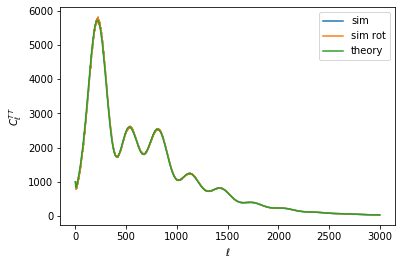

In [12]:
plt.plot(factor[2:3000]*teb_cls['TT'][2:3000], label='sim')
plt.plot(factor[2:3000]*rot_teb_cls['TT'][2:3000], label='sim rot')
plt.plot(theory_cl[1:3000,1], label='theory')
plt.legend()
plt.xlabel('$\ell$')
plt.ylabel('$C_{\ell}^{TT}$')
#plt.yscale('log')
#plt.xscale('log')
#plt.plot(factor*omap_cl[0])

Text(0, 0.5, '$C_{\\ell}^{\\mathrm{EE}}$')

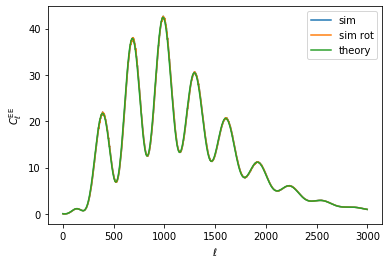

In [13]:
plt.plot(factor[2:3000]*teb_cls['EE'][2:3000], label='sim')
plt.plot(factor[2:3000]*rot_teb_cls['EE'][2:3000], label='sim rot')
plt.plot(theory_cl[1:3000,2], label='theory')
plt.legend()
plt.xlabel('$\ell$')
plt.ylabel(r'$C_{\ell}^{\mathrm{EE}}$')
#plt.yscale('log')
#plt.xscale('log')
#plt.plot(factor*omap_cl[0])

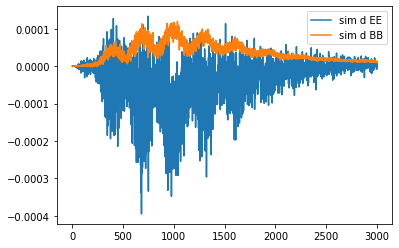

In [25]:
plt.plot(factor[2:3000]*(rot_teb_cls['EE']-teb_cls['EE'])[2:3000], label='sim d EE')
plt.plot(factor[2:3000]*(rot_teb_cls['BB']-teb_cls['BB'])[2:3000], label='sim d BB')
plt.legend()

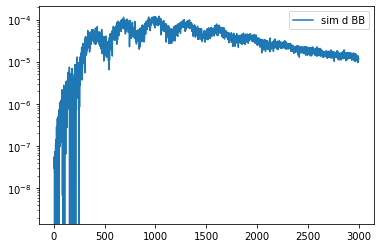

In [26]:
plt.plot(factor[2:3000]*(rot_teb_cls['BB']-teb_cls['BB'])[2:3000], label='sim d BB')
plt.legend()
plt.yscale('log')

Text(0, 0.5, '$C_{\\ell}^{TE}$')

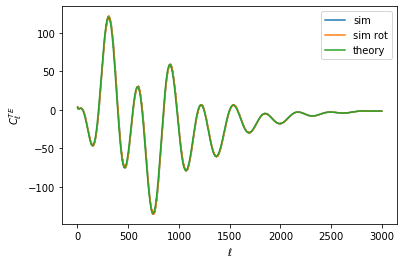

In [100]:
plt.plot(factor[2:3000]*teb_cls['TE'][2:3000], label='sim')
plt.plot(factor[2:3000]*rot_teb_cls['TE'][2:3000], label='sim rot')
plt.plot(theory_cl[2:3000,4], label='theory')
plt.legend()
plt.xlabel('$\ell$')
plt.ylabel('$C_{\ell}^{TE}$')
#plt.yscale('log')
#plt.xscale('log')
#plt.plot(factor*omap_cl[0])

/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, '$C_{\\ell}^{TE}$')

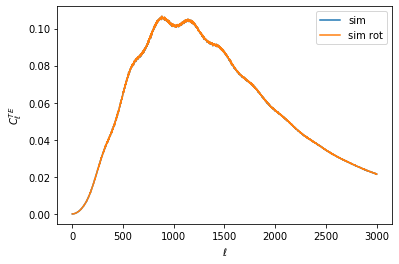

In [101]:
plt.plot(ls[2:3000], (factor*teb_cls['BB'])[2:3000], label='sim')
plt.plot(ls[2:3000], (factor*rot_teb_cls['BB'])[2:3000], label='sim rot')
# plt.plot(theory_cl[2:3000,4], label='theory')
plt.legend()
plt.xlabel('$\ell$')
plt.ylabel('$C_{\ell}^{TE}$')
#plt.yscale('log')
#plt.xscale('log')
#plt.plot(factor*omap_cl[0])

In [102]:
A_cb = 1E-7
params = {
        "output" : " tCl, pCl, lCl, rCl" ,
        "l_max_scalars" : 6000,
        "lensing": 'yes',
        "rotation": 'yes',
        "alpha": 0,
        "A_cb": A_cb
            }
        
cosmo = Class()
cosmo.set(params)
cosmo.compute(level=['rotation'])
rot_cls = cosmo.rotated_cl()
lensed_cls = cosmo.lensed_cl()

In [103]:
A_cb = 1E-7
unlensed_params = {
        "output" : " tCl, pCl, rCl" ,
        "l_max_scalars" : 6000,
        "rotation": 'yes',
        "alpha": 0,
        "A_cb": A_cb
            }
        
cosmo = Class()
cosmo.set(unlensed_params)
cosmo.compute(level=['rotation'])
rot_unlensed_cls = cosmo.rotated_cl()

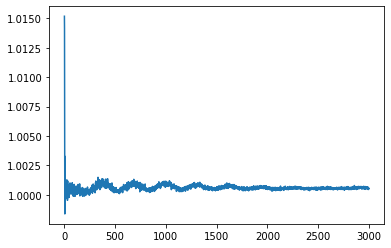

In [104]:
plt.plot(ells[2:3000], rot_teb_cls['BB'][2:3000]/teb_cls['BB'][2:3000], label='sim')

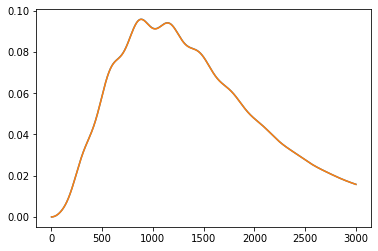

In [105]:
Tcmb = 2.72e6
plt.plot(ells[2:3000], Tcmb**2*(factor*rot_cls['bb'])[2:3000])
plt.plot(ells[2:3000], Tcmb**2*(factor*lensed_cls['bb'][:6001])[2:3000])

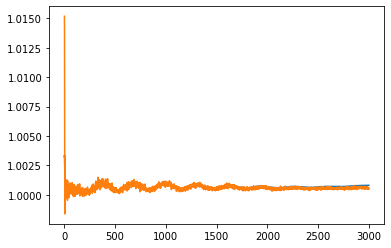

In [106]:
plt.plot(ells[2:3000], rot_cls['bb'][2:3000]/lensed_cls['bb'][2:3000])
plt.plot(ells[2:3000], rot_teb_cls['BB'][2:3000]/teb_cls['BB'][2:3000])

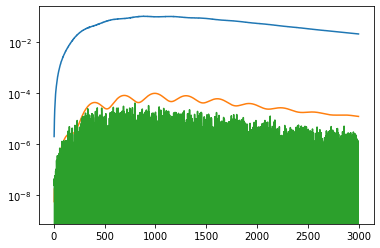

In [112]:
plt.plot(ells[2:3000], (factor*rot_teb_cls['BB'])[2:3000])
# plt.plot(ells[2:3000], (factor*(rot_teb_cls['BB']-teb_cls['BB']))[2:3000])
plt.plot(ells[2:3000], Tcmb**2*((factor*rot_unlensed_cls['bb'])[2:3000]))
# plt.plot(ells[2:3000], abs((factor*(rot_teb_cls['BB']-teb_cls['BB']))[2:3000]-Tcmb**2*((factor*rot_unlensed_cls['bb'])[2:3000])))
plt.plot(ells[2:3000], (factor*(rot_teb_cls['BB']-teb_cls['BB']))[2:3000]-Tcmb**2*((factor*rot_unlensed_cls['bb'])[2:3000]))
plt.yscale('log')

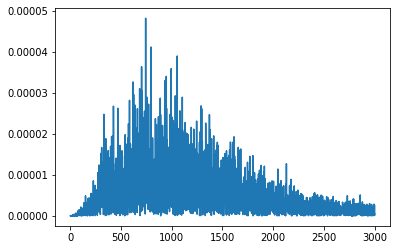

In [79]:
plt.plot(ells[2:3000], abs((factor*(rot_teb_cls['BB']-teb_cls['BB']))[2:3000]-Tcmb**2*((factor*rot_unlensed_cls['bb'])[2:3000])))

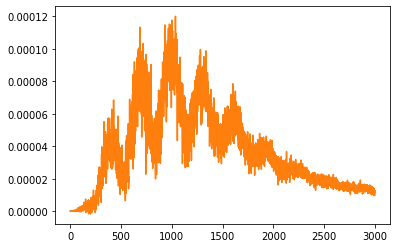

In [56]:
plt.plot(ells[2:3000], Tcmb**2*((factor*rot_cls['bb'])[2:3000]-(factor*lensed_cls['bb'][:6001])[2:3000]))
plt.plot(ells[2:3000], (factor*(rot_teb_cls['BB']-teb_cls['BB']))[2:3000])

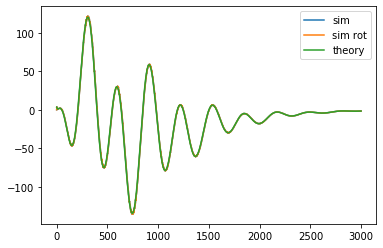

In [32]:
plt.plot(factor[1:3000]*np.mean(teb_cls, axis=0)[3, 1:3000], label='sim')
plt.plot(factor[1:3000]*np.mean(rot_teb_cls, axis=0)[3, 1:3000], label='sim rot')
plt.plot(theory_cl[1:3000,4], label='theory')
plt.legend()
#plt.yscale('log')
#plt.xscale('log')
#plt.plot(factor*omap_cl[0])

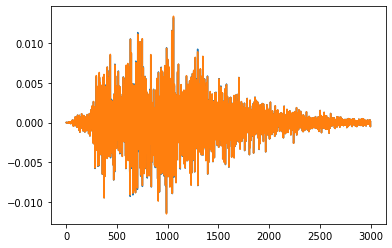

In [33]:
plt.plot(factor[1:3000]*np.mean(teb_cls, axis=0)[4,1:3000], label='sim')
plt.plot(factor[1:3000]*np.mean(rot_teb_cls, axis=0)[4,1:3000], label='sim rot')

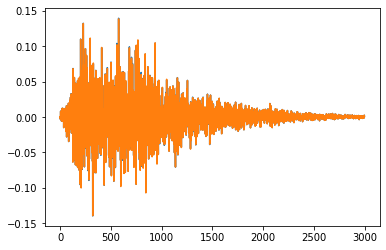

In [34]:
plt.plot(factor[1:3000]*np.mean(teb_cls, axis=0)[5,1:3000], label='sim')
plt.plot(factor[1:3000]*np.mean(rot_teb_cls, axis=0)[5,1:3000], label='sim rot')